In [1]:
import re  
import nltk
import string
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
import gensim
from nltk.stem.porter import *
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

C:\Users\deepak\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
%matplotlib inline
stemmer = PorterStemmer()

model = re.compile('@\w+')
model2 = re.compile('[^a-zA-Z0-9#]')

In [4]:
train  = pd.read_csv('C:\\Users\\Deepak\\Downloads\\train_E6oV3lV.csv')
test = pd.read_csv('C:\\Users\\Deepak\\Downloads\\test_tweets_anuFYb8.csv')

In [5]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [6]:
# 1 means bad speech and 0 means positive

In [7]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [8]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [9]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [10]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [11]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

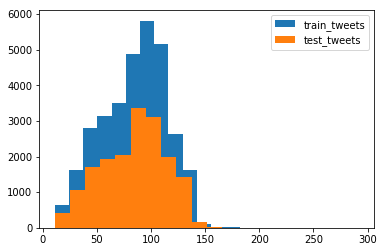

In [12]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [13]:
length_train[:10]

0    102
1    122
2     21
3     86
4     39
5    116
6     74
7    143
8     87
9     50
Name: tweet, dtype: int64

In [14]:
combi = train.append(test, ignore_index=True)
combi.shape

(49159, 3)

In [15]:
combi.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation


In [16]:
combi['tidy_tweet'] = combi['tweet'].apply(lambda r: model.sub("", r))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda r: model2.sub(" ", r))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [18]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talking before they leave chaos disputes when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here #gr8


In [19]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: " ".join(stemmer.stem(i) for i in x.split()))
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talk befor they leav chao disput when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cav #champion #cleveland #clevelandcavali
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcom here #gr8


In [20]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
all_words[:500]

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #gr8 #ireland consum price'

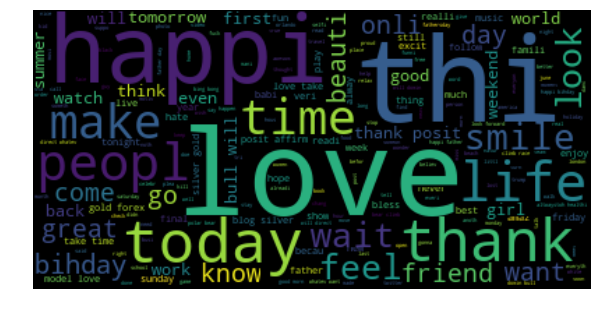

In [21]:
wordcloud = WordCloud().generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

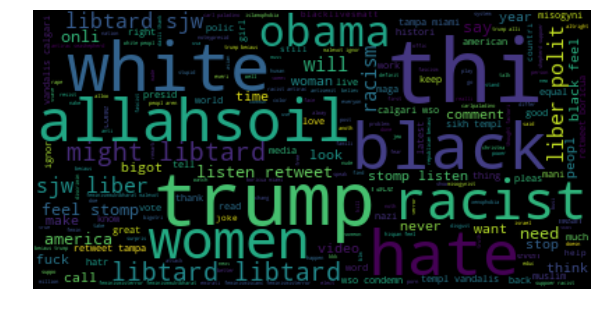

In [22]:
bad_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])

wordcloud = WordCloud().generate(bad_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

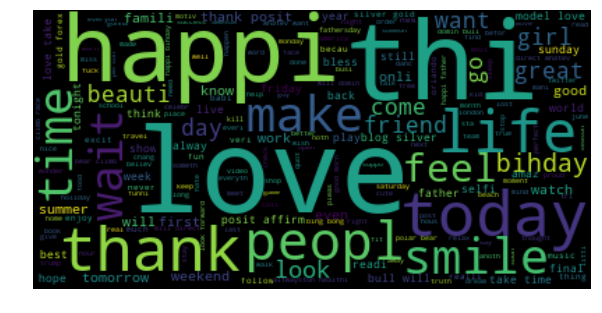

In [23]:
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud().generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [25]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

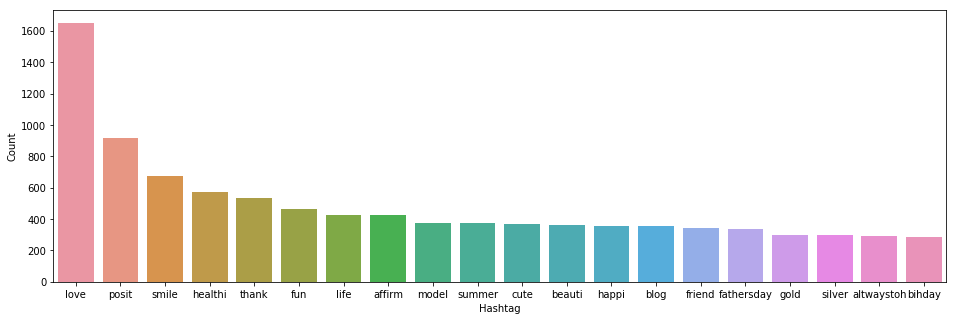

In [26]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

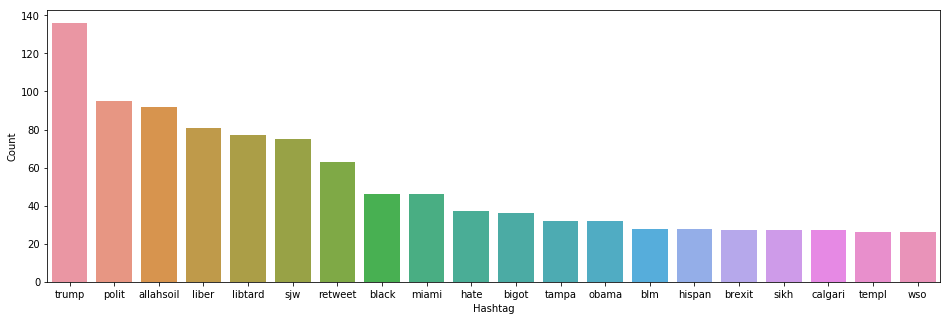

In [27]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

## Bag of Words

In [28]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [29]:
# Extracting train and test BoW features
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
X_train_bow, X_test_bow, y_train, y_test = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

In [30]:
lreg = LogisticRegression()
lreg.fit(X_train_bow, y_train)
prediction = lreg.predict_proba(X_test_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(y_test, prediction_int) 

0.5492142266335814

In [31]:
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train_bow, y_train)
prediction = svc.predict_proba(X_test_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_test, prediction_int)

0.5193370165745856

## Tfidf

In [32]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [33]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:] #We will not bother about it for now

X_train_tfidf = train_tfidf[y_train.index]
X_test_tfidf = train_tfidf[y_test.index]

In [34]:
lreg.fit(X_train_tfidf, y_train)
prediction = lreg.predict_proba(X_test_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(y_test, prediction_int)

0.5588752196836555

In [35]:
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train_tfidf, y_train)
prediction = svc.predict_proba(X_test_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_test, prediction_int)

0.5229936880072137

## Word2Vec Model

In [36]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(6525611, 7574260)

In [37]:
model_w2v.wv.most_similar(positive="dinner")

[('#avocado', 0.5633663535118103),
 ('fav', 0.5510713458061218),
 ('spaghetti', 0.5504077076911926),
 ('cookout', 0.5437676906585693),
 ('#foodcoma', 0.5407878756523132),
 ('#biall2016', 0.5368561148643494),
 ('spinach', 0.532572865486145),
 ('#toast', 0.5295079946517944),
 ('noodl', 0.5283399820327759),
 ('enrout', 0.5261030197143555)]

In [38]:
model_w2v.wv.most_similar(positive="trump")

[('hillari', 0.5855149030685425),
 ('donald', 0.5663660764694214),
 ('phoni', 0.5513802766799927),
 ('#delegaterevolt', 0.545392632484436),
 ('tomlin', 0.5283374190330505),
 ('jibe', 0.5279973745346069),
 ('unfavor', 0.526812732219696),
 ('melo', 0.5264325141906738),
 ('unstabl', 0.5251675844192505),
 ('unfit', 0.5214614272117615)]

In [39]:
model_w2v.wv.most_similar(positive="father")

[('papa', 0.5939338207244873),
 ('daddi', 0.592681884765625),
 ('dadsday', 0.5879444479942322),
 ('#clapton', 0.5875314474105835),
 ('#hackney', 0.574913501739502),
 ('#hackneywick', 0.5731765031814575),
 ('#homeon', 0.5721969604492188),
 ('#fathersday', 0.5647908449172974),
 ('#dadsrock', 0.5612182021141052),
 ('dad', 0.5568873882293701)]

In [40]:
model_w2v.wv.most_similar(positive="food")

[('void', 0.5228337645530701),
 ('#desktweet', 0.5204975008964539),
 ('#raw', 0.5170169472694397),
 ('frenzi', 0.502413809299469),
 ('#kfc', 0.5010244250297546),
 ('#doplant', 0.4994730055332184),
 ('integr', 0.49493807554244995),
 ('yaaaay', 0.49422815442085266),
 ('alfredo', 0.48962917923927307),
 ('patio', 0.48866042494773865)]

In [41]:
model_w2v['food'].dot(model_w2v['obama'])

3.100642

In [42]:
model_w2v['food'].dot(model_w2v['food'])

38.43612

In [43]:
model_w2v['father'].dot(model_w2v['#clapton'])

10.884647

In [44]:
model_w2v['father'].dot(model_w2v['obama'])

7.6843886

In [45]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [46]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape  

(49159, 200)

In [47]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]  #Ignore this for now

X_train_w2v = train_w2v.iloc[y_train.index,:]
X_test_w2v = train_w2v.iloc[y_test.index,:]

In [48]:
lreg.fit(X_train_w2v, y_train)
prediction = lreg.predict_proba(X_test_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(y_test, prediction_int)

0.6329866270430906

In [49]:
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train_w2v, y_train)
prediction = svc.predict_proba(X_test_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(y_test, prediction_int)

0.6367851622874807

In [50]:
rf = RandomForestClassifier(n_estimators=400, random_state=11)
rf.fit(X_train_w2v, y_train)

prediction = rf.predict(X_test_w2v)
f1_score(y_test, prediction)

0.5102260495156082